# Progettazione e Analisi di Algoritmi

Verifiche sull'articolo: 

### Interesting Series Associated with Central Binomial Coefficients, Catalan Numbers and Harmonic Numbers 
di Hongwei Chen

[link articolo originale](https://cs.uwaterloo.ca/journals/JIS/VOL19/Chen/chen21.html)

Studente: Filippo Mameli - 6222254 - filippo.mameli@stud.unifi.it

### Setup del progetto

In [2]:
from sympy import *
from sympy import Sum, factorial, oo, catalan, harmonic
from sympy.abc import i, j, k, m, n, x, t
import sys
import matplotlib.pyplot as plt
import matplotlib
init_printing()

EXP_VALUE = 10

# 1) Introduzione
I numeri di Catalan sono definiti come:

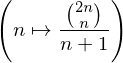

In [3]:
CN = Function('C_n')
n = symbols('n', integer=True)
catalan_expr = 1 / (n + 1) * binomial(2 * n, n)
CN = Lambda([n], catalan_expr)
CN

I primi 10 numeri di catalan sono:

In [4]:
[CN(i) for i in range(0, 11)]

### Coefficienti binomiali centrali
Sappiamo che la funzione generatrice dei coefficienti binomiali centrali è data da:
$$\sum_{n=0}^{\infty}\binom{2n}{n}x^n = \frac{1}{\sqrt{1-4x}}$$
Si può controllare infatti per i primi dieci elementi che questa relazione è vera

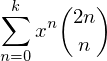

In [5]:
centralN = Sum(binomial(2 * n, n)*x**n, (n,0,k))
centralN

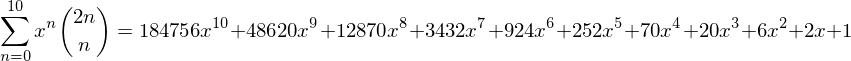

In [6]:
expanded = centralN.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

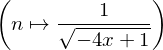

In [7]:
x = symbols('x', integer=True)
centralBinomialCoef_expr = Lambda([n],1 / (sqrt(1 - 4 * x)))
centralBinomialCoef_expr

In [8]:
series(centralBinomialCoef_expr(x), x, n=(EXP_VALUE + 1))

### Numeri di Catalan
Per i numeri di Catalan invece vale questa relazione:
$$\sum_{n=0}^{\infty}C_nx^n =\sum_{n=0}^{\infty}\frac{1}{n + 1}\binom{2n}{n}x^n = \frac{1-\sqrt{1-4x}}{2x}$$
Infatti:

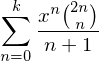

In [9]:
Cx = Sum(CN(n)*x**n, (n,0,k))
Cx

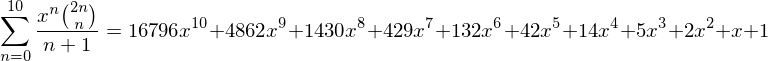

In [10]:
expanded = Cx.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

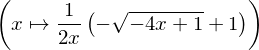

In [11]:
catalan_expr = Lambda([x],(1 - sqrt(1 - 4 * x)) / (2*x))
catalan_expr

In [12]:
series(catalan_expr(x), x, n=11)

Dalla funzione generatrice dei coefficienti binomiali, i numeri di Catalan e i numeri amonici
sono state ricavate alcune interessanti serie come
$$\sum_{n=1}^{\infty}\frac{1}{n^3}H_n = \frac{\pi^4}{72}$$
e 
$$\sum_{n=1}^{\infty}\frac{1}{n^2}H_n^2 = \frac{17\pi^4}{360}$$

In seguito si propongono alcuni risultati.

$$\sum_{n=1}^{\infty}\frac{1}{n^3}H_n = \frac{\pi^4}{72}$$
Per verificare l'uguaglianza si utilizza la seconda formula sviluppata nell'articolo cioè:
$\sum_{n=1}^{\infty}\frac{1}{n^3}H_n = \frac{5}{4}\sum_{n=1}^{\infty}\frac{1}{n^4} = \frac{\pi^4}{72}$.

In questa formulazione lo strumento riesce a valutare l'uguaglianza con la funzione di $==$

In [13]:
h1 = Lambda([n], Sum(harmonic(n)*1/n**3, (n, 1, 100)))
h1_simple = Lambda([n], zeta(4) * 5/4)
(h1_simple(n).doit()) == (pi**4/72).doit()

True

Il procedimento è identico per la seconda formula

In [14]:
h2 = Lambda([n], Sum(harmonic(n)**2*1/n**2, (n, 1, oo)))
h2_simple = Lambda([n], zeta(4) * 17/4)
(h2_simple(n).doit()) == (17*pi**4/360).doit()

True

Invocando la formula di Gauss per le serie ipergeometriche si arriva a risultati come:
$$\sum_{k=0}^{n}\binom{n}{k}^2H_k = \binom{2n}{n}(2H_n - H_{2n})$$

In [15]:
h3 = Lambda([n], Sum(harmonic(k) * binomial(n,k)**2, (k, 1, n)))
h3_expr = Lambda([n], binomial(2*n, n)*(2*harmonic(n) - harmonic(2*n)))
[(h3(i).doit() == h3_expr(i).doit()) for i in range(0, 10)]

[True, True, True, True, True, True, True, True, True, True]

Si mostra che
$$\sum_{n=0}^{\infty}\frac{1}{8^n}\binom{2n}{n}H_n = 2\sqrt2 \ ln \ (\frac{1 +\sqrt2}{2})$$

In [16]:
h4 = Lambda([n], Sum(harmonic(n) * binomial(2*n, n) * 1/ 8**n, (n, 0, oo)))
h4_expr = 2 * sqrt(2) * ln((1 + sqrt(2)) / 2)
h4(n).evalf() == h4_expr.evalf()

True

Manipolando $C(x)$ si possono trovare altre serie interessanti che contengono $\binom{2n}{n}(H_{2n} - H_n), C_n(H_{2n} - H_n)$ e $\binom{2n}{n}h_n$ con $h_n$ definito come:
$$ h_n = 1 + \frac{1}{3} + \frac{1}{5} + \dots + + \frac{1}{2n - 1}  $$

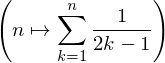

In [17]:
h_n = Lambda([n], Sum(1/ (2*k - 1), (k, 1, n)))
h_n

In particolare si ottengono le seguenti serie:

$$\sum_{n=1}^{\infty} 8^{- n} {\binom{2 n}{n}} \operatorname{F}{\left (n \right )}h_n = \frac{\sqrt{10}}{10} \log{\left (2 \right )} + \frac{\sqrt{2}}{2} \log{\left (\frac{\sqrt{5}}{2} + \frac{3}{2} \right )}$$

Dove $F_n$ è l'n-esimo numero di Fibonacci.

\begin{equation}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n-1} - H_n)\frac{x^n}{n} = \ln^2(C(x)).
\end{equation}

Per verificare le uguaglianze si utilizzerà dei plot per visualizzare l'andamento delle serie infinite.

La linea blu del grafico mostra l'andamento di $\sum_{n=1}^{\infty} 8^{- n} {\binom{2 n}{n}} \operatorname{F}{\left (n \right )}h_n $ mentre la linea verde $\frac{\sqrt{10}}{10} \log{\left (2 \right )} + \frac{\sqrt{2}}{2} \log{\left (\frac{\sqrt{5}}{2} + \frac{3}{2} \right )}$

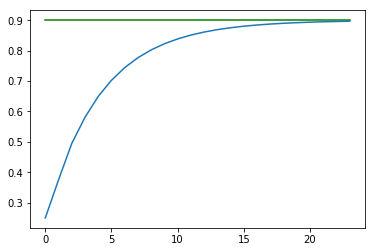

In [18]:
%matplotlib inline
N = symbols('N', integer = True)
h5 = Lambda([n,N], Sum(h_n(n) * binomial(2*n, n) * 1/ 8**n * fibonacci(n), (n, 1, N)))
h5_expr = 1/sqrt(10) * ln(2) + 1/sqrt(2) * ln((3 + sqrt(5))/ 2)
plt.plot([h5_expr.evalf()] * 24, 'g')
plt.plot([h5(n, N) for N in range(1, 25)])
plt.show()

\begin{equation}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n-1} - H_n)\frac{x^n}{n} = \ln^2(C(x)).
\end{equation}

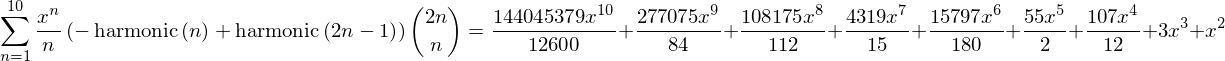

In [19]:
h6 = Sum(binomial(2*n, n) * (harmonic(2 * n - 1)- harmonic(n))*x**n/n,(n, 1, k))
expanded = h6.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

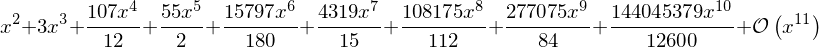

In [20]:
h6_expr = Lambda([n],(ln(catalan_expr(x)))**2)
series(h6_expr(x), x, n=(EXP_VALUE + 1))

# 2) Teoremi principali
Si comincia stabilendo la funzione generatrice di $\binom{2n}{n}H_n$. Si conosce questa relazione:
$$H_n = \sum_{k=1}^n\,\frac{1}{k} = \int_0^1\,\left(\sum_{k=0}^{n-1}\,t^k\right)\,dt = \int_0^1\,\frac{1- t^n}{1-t}\,dt,$$

In [21]:
harmonic(n)
h7 = Lambda([n], Integral(Sum(x**k, (k, 0, n - 1)),(x, 0, 1)))
h7_2 = Lambda([n], Integral((1 - t**n)/(1 - t),(t, 0, 1)))
[(h7(i).doit(), h7(i).doit() == harmonic(i) == h7_2(i).doit()) for i in range(0, 5)]

[(0, True), (1, True), (3/2, True), (11/6, True), (25/12, True)]

\begin{eqnarray*}
\sum_{n=1}^\infty\,\binom{2n}{n}H_n\,x^n & = & \sum_{n=1}^\infty\,\binom{2n}{n}x^n\int_0^1\,\frac{1- t^n}{1-t}\,dt\\
& = & \int_0^1\,\frac{1}{1-t}\,\left(\sum_{n=1}^\infty\,\binom{2n}{n}\,(x^n - (xt)^n)\right)\,dt\\
& = & \int_0^1\,\frac{1}{1-t}\left(\frac{1}{\sqrt{1-4x}} - \frac{1}{\sqrt{1 -4xt}}\right)\,dt.
\end{eqnarray*}

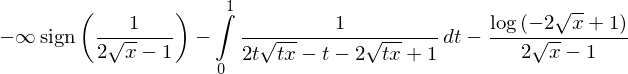

In [22]:
h9 = Lambda([n], binomial(2*n, n)* harmonic(n))
h9_4 = integrate(1/(1 - t) * (1/(1 - sqrt(4*x))), (t,0,1))
h9_5 = integrate(1/(1 - t) * (- 1/(1 - sqrt(4*x*t))), (t,0,1))
h9_4 + h9_5

Simpy non riesce a calcolare l'integrale $ \int_0^1\,\frac{1}{1-t}\left(\frac{1}{\sqrt{1-4x}} - \frac{1}{\sqrt{1 -4xt}}\right)\,dt $ nello stesso modo di Mathematica pur agevolando i calcoli.
### Teorema 1
Sia $H_n$ l'n-esimo numero armonico. Allora
\begin{equation} 
\sum_{n=1}^\infty\,\binom{2n}{n}H_n\,x^n = \frac{2}{\sqrt{1-4x}}\,\ln\left(\frac{1+\sqrt{1 -4x}}{2\sqrt{1-4x}}\right). 
\end{equation}

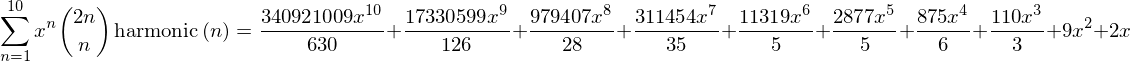

In [23]:
h9 = Sum(binomial(2*n, n)* harmonic(n)*x**n,(n,1,k))
h9_expr = Lambda([n], 2/sqrt(1 - 4*x) * ln((1 + sqrt(1 - 4*x))/ (2*sqrt(1 - 4*x))))
expanded = h9.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

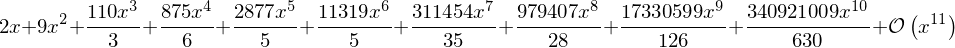

In [24]:
series(h9_expr(x), x, n=(EXP_VALUE + 1))

Come immediata conseguenza del teorema 1, integrando entrambe le parti rispetto a x si ottiene il corrollario 2:
### Corollario 2
Sia $C_n$ l'n-esimo numero di Catalan. Allora
\begin{equation}  
\sum_{n=1}^\infty\,C_nH_n\,x^{n+1} =  \ln 2 + \sqrt{1-4x}\ln(2\sqrt{1-4x}) - (1 + \sqrt{1 -4x})\ln(1+\sqrt{1 -4x})). 
\end{equation}


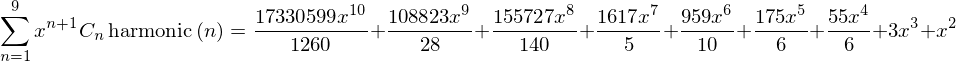

In [25]:
h10 = Sum(catalan(n) * harmonic(n)*x**(n+1),(n,1,k))
h10_expr = Lambda([n], ln(2) + sqrt(1-4*x)*ln(2*sqrt(1-4*x))-(1 + sqrt(1 -4*x))*ln(1+sqrt(1 -4*x)))
expanded = h10.subs({k:9})
Eq(expanded, expanded.doit())

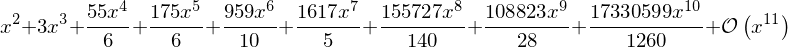

In [26]:
series(h10_expr(x), x, n=(EXP_VALUE + 1))

\begin{equation}
\frac{1}{(1-x)^{m+1}}\,\ln\frac{1}{1-x} = \sum_{n=0}^\infty\,\binom{m+n}{n}(H_{m+n} - H_m)x^n.
\end{equation}  

Il risultato viene testato con $m=3$ come esempio

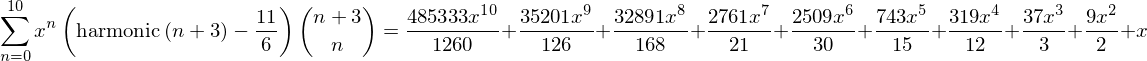

In [27]:
h11_expr = Lambda([m], 1/(1 - x)**(m + 1)*ln(1/(1 - x)))
h11 = Sum(binomial(m+n, n)* (harmonic(m + n) - harmonic(m))*x**n,(n,0,k))
expanded = h11.subs({m:3,k:EXP_VALUE})
Eq(expanded, expanded.doit())

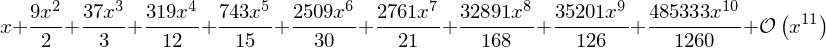

In [28]:
series(h11_expr(3), x , n=(EXP_VALUE + 1))

Sia $m = n$. Allora
\begin{equation}
\binom{2n}{n}(H_{2n} - H_n) = \sum_{k=1}^n\,\frac{1}{k}\binom{2n-k}{n}.
\end{equation}

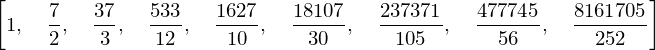

In [29]:
h12 = Lambda([n], binomial(2*n, n)* (harmonic(2*n) - harmonic(n)))
h12_2 = Lambda([n], Sum(1/(k)*binomial(2*n - k, n), (k, 1, n)))
[(h12(i).doit()) for i in range(1, 10)]         

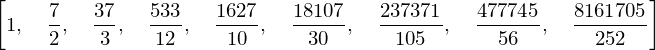

In [30]:
[(h12_2(i).doit()) for i in range(1, 10)] 

### Teorema 3
Sia $H_n$ l'n-esimo numero armonico. Allora
\begin{equation}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n} - H_n)\,x^n = - \frac{1}{\sqrt{1-4x}}\,\ln\left(\frac{1+\sqrt{1 -4x}}{2}\right) = \frac{1}{\sqrt{1 -4x}}\ln C(x), \
\end{equation}

dove $C(x)$ è la funzione generatrice dei numeri di Catalan.

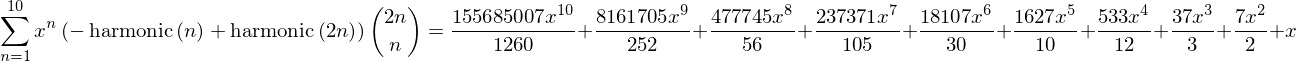

In [31]:
h13 = Sum(binomial(2*n, n)* (harmonic(2*n) - harmonic(n))*x**n, (n,1,k))
h13_1 = Lambda([n], -1/sqrt(1-4*x)*ln((1+sqrt(1-4*x))/2))
h13_2 = Lambda([x], 1/sqrt(1-4*x)*ln(CN(x)))
expanded = h13.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

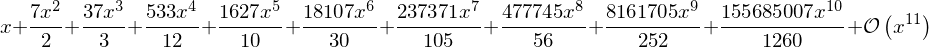

In [32]:
series(h13_1(x), x, n =(EXP_VALUE + 1))

Dato che

$$\sum_{m=0}^\infty\,\binom{2m + k}{m}t^m = \frac{1}{\sqrt{1- 4t}}\,\left(\frac{1 - \sqrt{1-4t}}{2t}\right)^k = \frac{C^k(t)}{\sqrt{1 - 4t}}$$

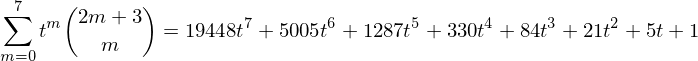

In [33]:
t = symbols('t', integer = True)
h13_p0 = Sum(binomial(2*m + k, m)* t**m, (m, 0, N))
h13_p0E = Lambda([t], 1/sqrt(1-4*t)*((1 - sqrt(1-4*t))/(2*t))**k)
expanded = h13_p0.subs({N:7,k:3})
Eq(expanded, expanded.doit())

In [34]:
expanded = series(h13_p0E(t), t, n = 8)
expanded.subs({k:3})

e inoltre che $-\ln(1- t) = \sum_{k=1}^\infty\,\frac{1}{k}t^k$, si trova:
\begin{eqnarray*}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n} - H_n)\,x^n & = &\frac{1}{\sqrt{1- 4x}}\,\sum_{k=1}^\infty\,\frac{1}{k}\,\left(\frac{1 - \sqrt{1-4x}}{2}\right)^k\\
& = & - \frac{1}{\sqrt{1-4x}}\,\ln\left(\frac{1+\sqrt{1 -4x}}{2}\right)\\
& = & \frac{1}{\sqrt{1-4x}}\,\ln C(x).
\end{eqnarray*}

Integrando entrambe le parti rispetto a x si ottiene una sequenza per $C_n(H_{2n} - H_n)$.
### Corollario 4
Sia $C_n$ l'$n$-esimo numero di Catalan. Allora:
\begin{equation} 
 \sum_{n=1}^\infty\,C_n(H_{2n} - H_n)\,x^n =  \frac{1}{2x}\left[(1-\sqrt{1-4x}) + (1 + \sqrt{1 -4x})\ln\left(\frac{1+\sqrt{1 -4x}}{2}\right)\right]. \end{equation}

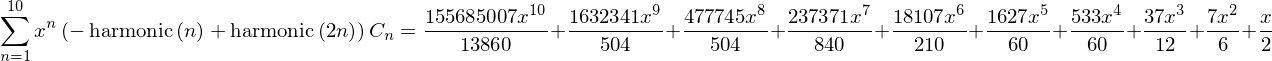

In [35]:
h14 = Sum(catalan(n)*(harmonic(2*n) - harmonic(n))*x**n, (n,1,k))
h14_expr = Lambda([x], 1/(2*x) *((1-sqrt(1-4*x)) + (1 + sqrt(1 - 4*x)) * ln((1+sqrt(1-4*x))/2)))
expanded = h14.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

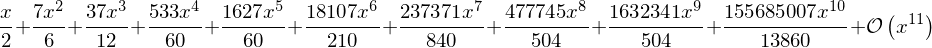

In [36]:
series(h14_expr(x).doit(), x, n =(EXP_VALUE + 1))

Dividento entrambe le parti per $x$ e integrando da $0$ a $x$, si trova che
$$\sum_{n=1}^\infty\,\binom{2n}{n}\,\frac{x^n}{n} = -2 \ln\left(\frac{1+\sqrt{1- 4x}}{2}\right) = 2\ln C(x).$$

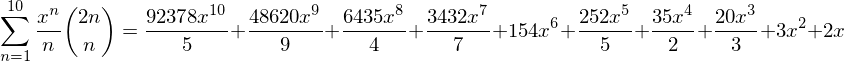

In [37]:
h15 = Sum(binomial(2*n, n)*x**n/n, (n,1,k))
h15_expr = Lambda([x], -2* ln((1+sqrt(1-4*x))/2))
expanded = h15.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

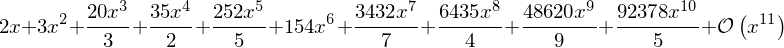

In [38]:
series(h15_expr(x).doit(), x, n =(EXP_VALUE + 1))

Ripetendo il processo si ha
\begin{equation}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n} - H_n)\,\frac{x^n}{n} = - \int_0^x\,\frac{1}{t\sqrt{1-4t}}\,\ln\left(\frac{1+\sqrt{1 -4t}}{2}\right)\,dt.
\end{equation}

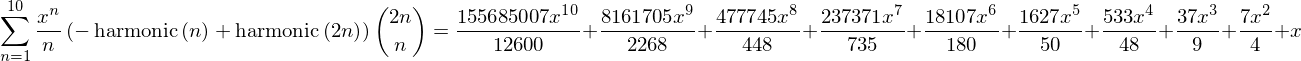

In [39]:
h16 = Sum(binomial(2*n, n)*(harmonic(2*n) - harmonic(n))*x**n/n, (n,1,k))
h16_expr = Lambda([t], -Integral(1/(t*sqrt(1-4*t))*ln((1+ sqrt(1-4*t))/2),(t,0,x)))
expanded = h16.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

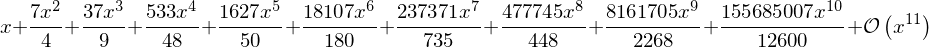

In [40]:
series(h16_expr(x).doit(), x, n =(EXP_VALUE + 1))

Dato che $H_{2n} = H_{2n-1} + \frac{1}{2n}$, combinando i risultati si ottiene:
\begin{eqnarray*}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n-1} - H_n)\frac{x^{n}}{n} & = & \sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n} - H_n)\frac{x^{n}}{n} - \frac{1}{2}\sum_{n=1}^\infty\,\binom{2n}{n}\frac{x^{n}}{n^2}\\
& = & \int_0^x\,\left(\frac{1}{t} - \frac{1}{t\sqrt{1-4t}}\right)\ln\left(\frac{1+\sqrt{1 -4t}}{2}\right)dt\\
& = & \int_0^x\,\,2\ln\left(\frac{1+\sqrt{1 -4t}}{2}\right)\,\left(\ln\left(\frac{1+\sqrt{1 -4t}}{2}\right)\right)'dt\\
& =& \ln^2\left(\frac{1+\sqrt{1 -4x}}{2}\right),
\end{eqnarray*}

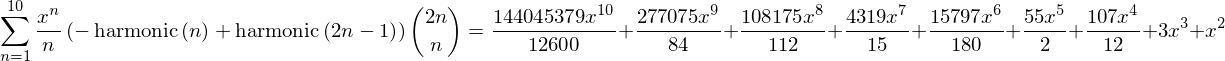

In [41]:
h16 = Sum(binomial(2*n, n)*(harmonic(2*n-1) - harmonic(n))*x**n/n, (n,1,k))
h16_expr = Lambda([x], ln((1+sqrt(1-4*x))/2)**2)
expanded = h16.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

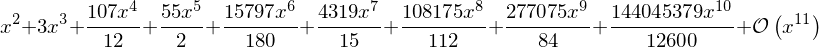

In [42]:
series(h16_expr(x).doit(), x, n =(EXP_VALUE + 1))

### Teorema 5
Sia $C(x)$ è la funzione generatrice dei numeri di Catalan, allora
\begin{equation}     
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n-1} - H_n)\frac{x^{n}}{n} = \ln^2C(x).
\end{equation}

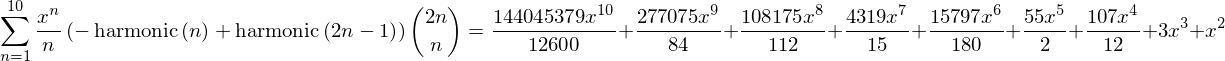

In [43]:
Cx = Lambda([x],(1 - sqrt(1 - 4 * x)) / (2*x))
h17 = Sum( binomial(2*n, n)*(harmonic(2*n - 1) - harmonic(n))*x**n/n, (n,1,k))
h17_expr = Lambda([x], ln(Cx(x))**2)
expanded = h17.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

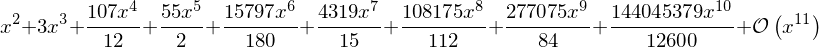

In [44]:
series(h17_expr(x).doit(), x, n =(EXP_VALUE + 1))

### Teorema 6
Sia $H_n$ l'enneesimo numero armonico, allora
\begin{equation}  
\sum_{n=1}^\infty\,\binom{2n}{n}H_{2n}\,x^n =  \frac{1}{\sqrt{1-4x}}\left[\ln\left(\frac{1+\sqrt{1 -4x}}{2}\right) -2\ln\sqrt{1-4x}\right].
\end{equation}

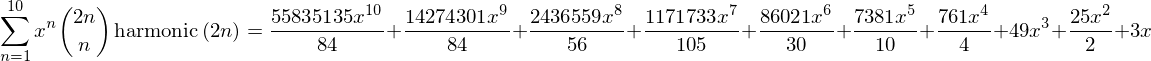

In [45]:
h18 = Sum(binomial(2*n, n)*harmonic(2*n)*x**n,(n,1,k))
expanded = h18.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

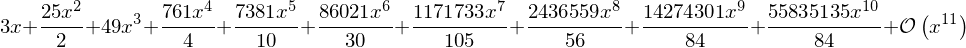

In [46]:
h18_expr = Lambda([n], 1/(sqrt(1-4*x))*(ln((1+sqrt(1-4*x))/2) - 2*ln(sqrt(1-4*x))))
series(h18_expr(x).doit(), x, n =(EXP_VALUE + 1))

### Corollario 7
Sia $C_n$ l'ennesimo numero di Catalan, allora
\begin{equation}  
\sum_{n=1}^\infty\,C_nH_{2n}\,x^n =  \frac{1}{2x}\left[(1-\sqrt{1-4x}) - (1 + \sqrt{1 -4x})\ln(1+\sqrt{1 -4x}) + \ln 2 + \sqrt{1-4x}\ln(2-8x)\right]. 
\end{equation}

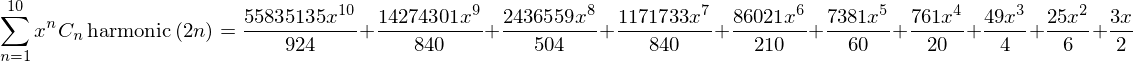

In [47]:
h19 = Sum(catalan(n)*harmonic(2*n)*x**n,(n,1,k))
expanded = h19.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

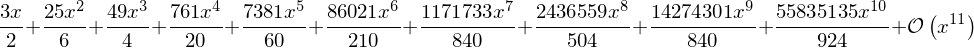

In [48]:
h19_expr = Lambda([n], 1/(2*x)*((1-sqrt(1-4*x))-(1+sqrt(1-4*x))*ln(1+sqrt(1-4*x))+ln(2)+sqrt(1-4*x)*ln(2-8*x)))
series(h19_expr(x).doit(), x, n =(EXP_VALUE + 1))

### Teorema 8
\begin{equation}  
\sum_{n=1}^\infty\,\binom{2n}{n}h_n\,x^n =  -\,\frac{1}{\sqrt{1-4x}}\ln\sqrt{1-4x}. 
\end{equation}

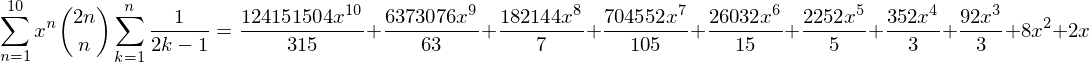

In [49]:
h20 = Sum( binomial(2*n, n)*h_n(n)*x**n, (n,1,k))
expanded = h20.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

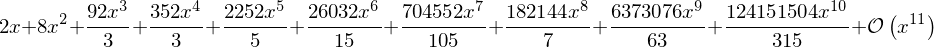

In [50]:
h20_expr = Lambda([n], -1/(sqrt(1-4*x))*ln(sqrt(1-4*x)))
series(h20_expr(x).doit(), x, n =(EXP_VALUE + 1))

### Corollario 9
Sia $C_n$ l'ennesimo numero di Catalan, allora
\begin{equation} 
\sum_{n=1}^\infty\,C_nh_{n}\,x^n =  \frac{1}{2x}\left(1-\sqrt{1-4x} + \sqrt{1-4x}\ln\sqrt{1-4x}\right).
\end{equation}

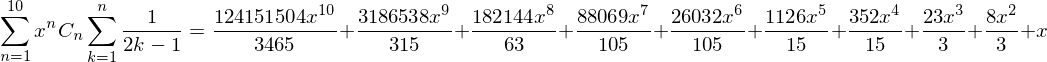

In [51]:
h21 = Sum( catalan(n)*h_n(n)*x**n,(n,1,k))
expanded = h21.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

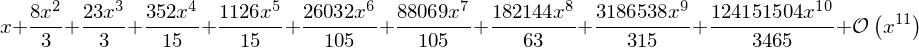

In [52]:
h21_expr = Lambda([n], 1/(2*x)*(1-sqrt(1-4*x)+sqrt(1-4*x)*ln(sqrt(1-4*x))))
series(h21_expr(x).doit(), x, n =(EXP_VALUE + 1))

# 3) Interesting series

Basandoci sui risultati precedenti si possono trovare molte altre serie interessanti. Qui sotto se ne fanno alcuni esempi.
\begin{eqnarray*}
\sum_{n=1}^\infty\,\frac{(-1)^n}{4^n}\,\binom{2n}{n}H_n& = & \sqrt{2}\ln\left(\frac{2 + \sqrt{2}}{4}\right)
\end{eqnarray*}

Converge molto lentamente

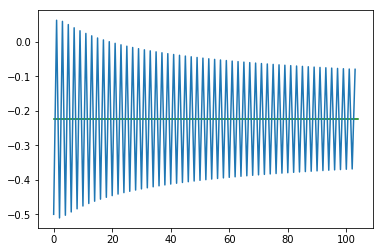

In [53]:
%matplotlib inline
N = symbols('N', integer = True)
s1 = Lambda([n, N], Sum((-1)**n/4**n*binomial(2*n,n)*harmonic(n), (n, 1, N)))
s1_expr = sqrt(2)*ln((2+sqrt(2))/4)
plt.plot([s1_expr.evalf()]*105, 'g')
plt.plot([s1(n, N) for N in range(1, 105)])
plt.draw()

\begin{eqnarray*}
\sum_{n=1}^\infty\,\frac{1}{8^n}\,\binom{2n}{n}H_n & = & 2\sqrt{2}\ln\left(\frac{1 + \sqrt{2}}{2}\right),\\
\end{eqnarray*}

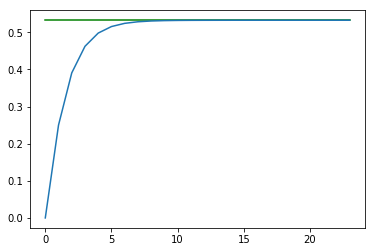

In [54]:
%matplotlib inline
N = symbols('N', integer = True)
s2 = Lambda([n, N], Sum( 1/8**n*binomial(2*n,n)*harmonic(n), (n, 1, N)))
s2_expr = 2*sqrt(2)*ln((1+sqrt(2))/2)
plt.plot([s2_expr.evalf()]*24, 'g')
plt.plot([s2(n, N) for N in range(0, 24)])
plt.show()

$$
\sum_{n=1}^\infty\,\frac{1}{4^n(n+1)}\,\binom{2n}{n}H_n = \sum_{n=1}^\infty\,\frac{1}{4^n}\,C_nH_n = 4\ln 2,
$$

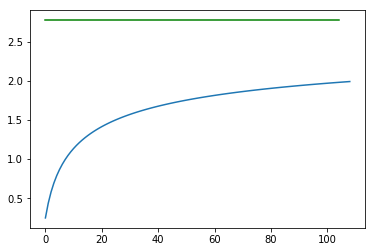

In [74]:
%matplotlib inline
N = symbols('N', integer = True)
s3 = Lambda([n, N], Sum( 1/4**n*catalan(n)*harmonic(n), (n, 1, N)))
s3_expr = 4*ln(2)
plt.plot([s3_expr.evalf()]*105, 'g')
plt.plot([s3(n, N) for N in range(1, 110)])
plt.show()

$$
\sum_{n=1}^\infty\,\frac{(-1)^{n+1}}{4^n(n+1)}\,\binom{2n}{n}H_n = \sum_{n=1}^\infty\,\frac{(-1)^{n+1}}{4^n}\,C_nH_n = (4+6\sqrt{2})\ln 2  - 4(1+\sqrt{2})\ln(1 + \sqrt{2}). 
$$

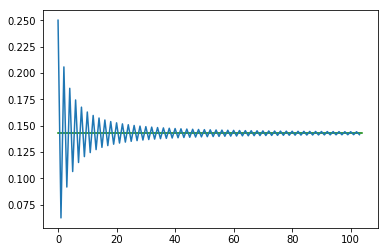

In [56]:
%matplotlib inline
N = symbols('N', integer = True)
s4 = Lambda([n, N], Sum( (-1)**(n+1)/4**n*catalan(n)*harmonic(n), (n, 1, N)))
s4_expr = (4+6*sqrt(2))*ln(2)- 4*(1+sqrt(2))*ln(1+sqrt(2))
plt.plot([s4_expr.evalf()]*105, 'g')
plt.plot([s4(n, N) for N in range(1, 105)])
plt.show()

\begin{eqnarray*}
\sum_{n=1}^\infty\,\frac{1}{8^n}\,\binom{2n}{n}(H_{2n} - H_n) & = & \sqrt{2}\ln(4 - 2\sqrt{2})
\end{eqnarray*}

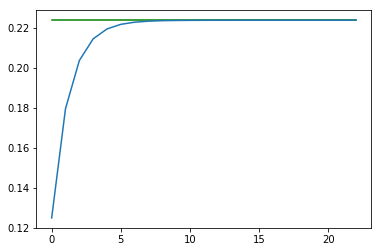

In [57]:
%matplotlib inline
N = symbols('N', integer = True)
s5 = Lambda([n, N], Sum( 1/8**n*binomial(2*n, n)*(harmonic(2*n) - harmonic(n)), (n, 1, N)))
s5_expr = sqrt(2) * ln(4-2*sqrt(2))
plt.plot([s5_expr.evalf()]*23, 'g')
plt.plot([s5(n, N) for N in range(1, 24)])
plt.show()

\begin{eqnarray*}
\sum_{n=1}^\infty\,\frac{1}{4^n}\,C_nh_{n} & = & 2
\end{eqnarray*}

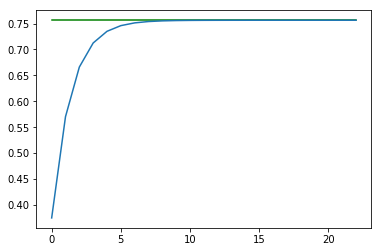

In [58]:
%matplotlib inline
N = symbols('N', integer = True)
s6 = Lambda([n, N], Sum( 1/8**n * binomial(2*n, n)*harmonic(2*n), (n, 1, N)))
s6_expr = sqrt(2)/2 * ln((3+2*sqrt(2))/2)
plt.plot([s6_expr.evalf()]*23, 'g')
plt.plot([s6(n, N) for N in range(1, 24)])
plt.show()

In particolare, ponendo $x = \frac{(1+ \sqrt{5})}{16}$ e $ x = \frac{(1-\sqrt{5})}{16}$ , rispettivamente, basandoci sul fatto che
$$\sqrt{3 \pm\sqrt{5}} = \frac{\sqrt{2}}{2}\,(\sqrt{5} \pm 1)$$
e che la formula di Binet è
$$F_n = \frac{1}{\sqrt{5}}\left[\left(\frac{1+\sqrt{5}}{2}\right)^n - \left(\frac{1-\sqrt{5}}{2}\right)^n\right],$$
si trova che
$$\sum_{n=1}^\infty\,\frac{1}{8^n}\binom{2n}{n}h_nF_n = \frac{1}{\sqrt{10}}\,\ln 2 + \frac{1}{\sqrt{2}}\ln\left(\frac{3 + \sqrt{5}}{2}\right),$$

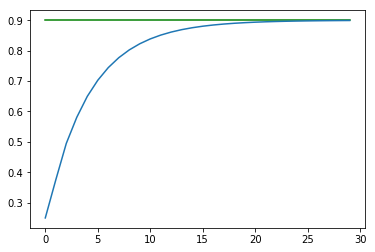

In [59]:
%matplotlib inline
N = symbols('N', integer = True)
FN = Lambda([n], 1/sqrt(5)*(((1+sqrt(5))/2)**n - ((1-sqrt(5))/2)**n))
s7 = Lambda([n, N], Sum( 1/8**n * binomial(2*n, n)*h_n(n)*FN(n), (n, 1, N)))
s7_expr = 1/sqrt(10) * ln(2) + 1/sqrt(2)*ln((3+sqrt(5))/2)
plt.plot([s7_expr.evalf()]*30, 'g')
plt.plot([s7(n, N) for N in range(1, 31)])
plt.show()

$$\sum_{n=1}^\infty\,n{2n \choose n}h_nx^n = \frac{2x}{(1-4x)^{3/2}} - \frac{x\ln(1-4x)}{(1-4x)^{3/2}}.$$

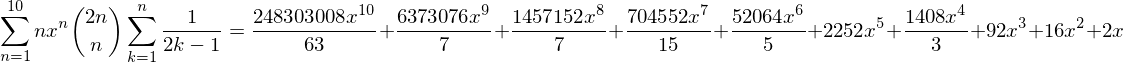

In [60]:
s8 = Sum(n*binomial(2*n,n)*h_n(n)*x**n, (n, 1, k))
s8_expr = Lambda([n], 2*x/(1-4*x)**(3./2) - x*ln(1-4*x)/(1-4*x)**(3./2))
expanded = s8.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

In [61]:
series(s8_expr(x), x, n=10)

Ponendo $x = 1/8$, si ha
$$\sum_{n=1}^\infty\,\frac{n}{8^n}{2n \choose n}h_n = \frac{1}{2}\sqrt{2} +\frac{1}{4}\sqrt{2} \ln 2.$$

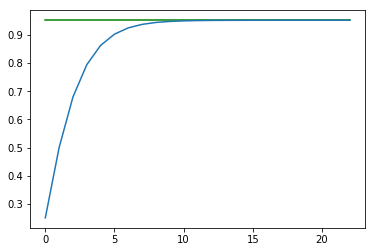

In [62]:
%matplotlib inline
N = symbols('N', integer = True)
s9 = Lambda([n, N], Sum( n/8**n*binomial(2*n,n)*h_n(n), (n, 1, N)))
s9_expr = 1./2* sqrt(2) + 1./4*sqrt(2)*ln(2)
plt.plot([s9_expr.evalf()]*23, 'g')
plt.plot([s9(n, N) for N in range(1, 24)])
plt.show()

# Sostituzione Trigonometrica
\begin{equation} 
\sum_{n=1}^\infty\,\binom{2n}{n}H_n\,x^n = \frac{2}{\sqrt{1-4x}}\,\ln\left(\frac{1+\sqrt{1 -4x}}{2\sqrt{1-4x}}\right). 
\end{equation}
Trasformando $x = \frac{1}{4}\sin^2t$
\begin{equation}
\sum_{n=1}^\infty\,\frac{1}{4^n}\,\binom{2n}{n}H_n\sin^{2n}t = \frac{2}{\cos t}\,\ln\left(\frac{1 + \cos t}{2\cos t}\right),
\end{equation}

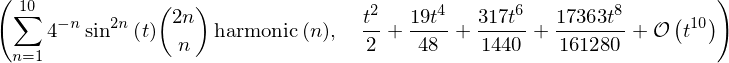

In [89]:
s10 = Sum(1/4**n*binomial(2*n,n)*harmonic(n)*sin(t)**(2*n),(n,1,k))
s10_expr = Lambda([t], 2/cos(t)*ln((1+cos(t))/(2*cos(t))))
expanded = s10.subs({k:EXP_VALUE})
expanded, series(expanded.doit(), t, n=EXP_VALUE)

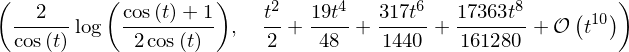

In [86]:
s10_expr(t), series(s10_expr(t), t, n=EXP_VALUE)

\begin{eqnarray}
\sum_{n=1}^\infty\,\frac{1}{4^n}\binom{2n}{n}(H_{2n} - H_n)\sin^{2n}t & = & - \frac{1}{\cos t}\,\ln\left(\frac{1 + \cos t}{2}\right)
\end{eqnarray}

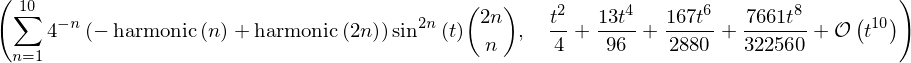

In [84]:
s28 = Sum(1/4**n*binomial(2*n,n)*(harmonic(2*n) - harmonic(n))*sin(t)**(2*n), (n,1,k))
s28_expr = Lambda([t], -1/cos(t)*ln((1+cos(t))/2))
expanded = s28.subs({k:EXP_VALUE})
expanded, series(expanded.doit(), t, n=EXP_VALUE)

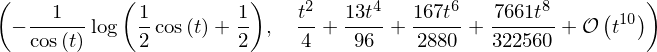

In [80]:
s28_expr(t), series(s28_expr(t), t, n=EXP_VALUE)

\begin{equation}
\sum_{n=1}^\infty\,\frac{1}{4^{n+1}}\,C_{n}H_n\sin^{2(n+1)}t =\ln 2 + \cos t\ln(2\cos t) - (1 + \cos t)\ln(1 + \cos t),
\end{equation}

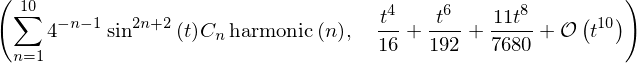

In [93]:
s11 = Sum(1/4**(n+1)*catalan(n)*harmonic(n)*sin(t)**(2*(n+1)),(n,1,k))
s11_expr = Lambda([t], ln(2)+cos(t)*ln(2*cos(t))-(1+cos(t))*ln(1+cos(t)))
expanded = s11.subs({k:EXP_VALUE})
expanded, series(expanded.doit(), t, n=EXP_VALUE)

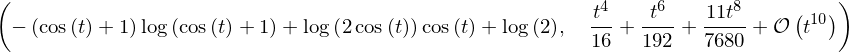

In [95]:
s11_expr(t), series(s11_expr(t), t, n=EXP_VALUE)

\begin{equation}
\sum_{n=1}^\infty\,\frac{1}{4^n(2n+1)}\,\binom{2n}{n}H_n = 4G - \pi\ln 2,
\end{equation}
dove  $G$ è la costante di Catalan, definita come
$$G := \sum_{k=0}^\infty\,\frac{(-1)^k}{(2k+1)^2}.$$

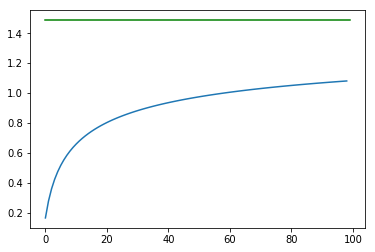

In [81]:
%matplotlib inline
G = Sum((-1)**k/(2*k+1)**2,(k,0,oo))
N = symbols('N', integer = True)
s12 = Lambda([n, N], Sum( 1/(4**n*(2*n+1))*binomial(2*n,n)*harmonic(n), (n, 1, N)))
s12_expr = 4*G.evalf()- pi*ln(2)
plt.plot([s12_expr.evalf()]*100, 'g')
plt.plot([s12(n, N) for N in range(1, 100)])
plt.show()

Se moltiplichiamo per $t\cos t$ e poi si integra da $0$ a $\pi/2$, dato che
$$\int_0^{\pi/2}\,t\cos t\sin^{2n}t\,dt = \frac{1}{2n+1}\left(\frac{\pi}{2} - \frac{(2n)!!}{(2n+1)!!}\right),$$
segue che
\begin{equation}
\sum_{n=1}^\infty\,\frac{1}{4^n(2n+1)}\,\binom{2n}{n}H_n\left(\frac{\pi}{2} - \frac{(2n)!!}{(2n+1)!!}\right) =\frac{1}{4}(8\pi G - \pi^2\ln 2 - 7\zeta(3)),
\end{equation}
dove $\zeta(x)$ è la funzione zeta di Riemann.

Troviamo subito problemi per i limiti di Simpy in quanto già per n=5 si calcoliamo il fattoriale di 120 e quindi riusciamo a vedere una leggera crescita nel grafico, ma siamo ben lontani dal valore atteso.

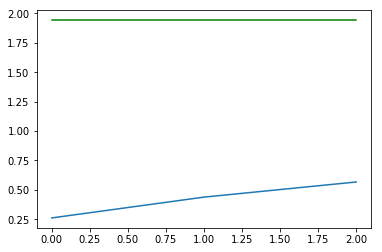

In [82]:
%matplotlib inline
# f = Integral(t*cos(t)*sin(t)**(2*n),(t,0,pi/2))
N = symbols('N', integer = True)
s13 = Lambda([n, N], Sum( 1/(4**n*(2*n+1))*binomial(2*n,n)*harmonic(n)*(pi/2 - factorial(factorial(2*n))/(factorial(factorial(2*n + 1)))), (n, 1, N)))
s13_expr = 1./4 *(8*pi*G.evalf()- pi**2*ln(2) - 7*zeta(3))
plt.plot([s13_expr.evalf()]*3, 'g')
plt.plot([s13(n, N).doit() for N in range(1, 4)])
plt.show()

\begin{equation}
\sum_{n=1}^\infty\,\frac{1}{(2n+1)^2}\,H_n = \frac{1}{4}\,(7\zeta(3) -\pi^2\ln 2). 
\end{equation}

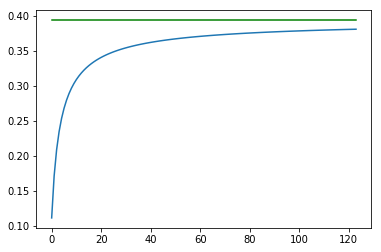

In [83]:
%matplotlib inline
# f = Integral(t*cos(t)*sin(t)**(2*n),(t,0,pi/2))
N = symbols('N', integer = True)
s14 = Lambda([n, N], Sum( 1/(2*n+1)**2*harmonic(n), (n, 1, N)))
s14_expr = 1./4 *(7*zeta(3) - pi**2*ln(2))
plt.plot([s14_expr.evalf()]*124, 'g')
plt.plot([s14(n, N).doit() for N in range(1, 125)])
plt.show()

\begin{equation}
\sum_{n=1}^\infty \frac{1}{4^n}\binom{2n}{n}(H_{2n} - H_n)\sin^{2n}t  =  - \frac{1}{\cos t}\,\ln\left(\frac{1 + \cos t}{2}\right)
\end{equation}

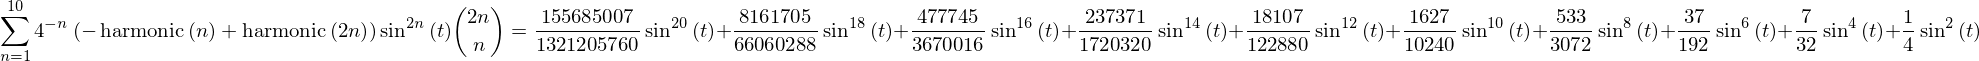

In [84]:
N = symbols('N', integer = True)
s15 = Sum( 1/4**n * binomial(2*n,n) * (harmonic(2*n) - harmonic(n))*sin(t)**(2*n), (n, 1, k))
s15_expr = Lambda([t],-1/cos(t)*ln(1./2 + cos(t)/2))
expanded = s15.subs({k:EXP_VALUE})
Eq(expanded, expanded.doit())

In [85]:
series(s15_expr(t), t, n=(EXP_VALUE + 1))

\begin{eqnarray*}
\sum_{n=1}^\infty\,\frac{1}{4^n(2n+1)}\,\binom{2n}{n}(H_{2n} -H_n) & = & \pi\ln 2 - 2G
\end{eqnarray*}

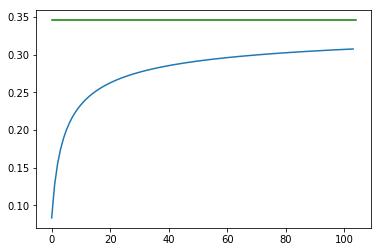

In [86]:
%matplotlib inline
G = Sum((-1)**k/(2*k+1)**2,(k,0,oo))
N = symbols('N', integer = True)
s16 = Lambda([n, N], Sum( 1/(4**n*(2*n+1))*binomial(2*n,n)*(harmonic(2*n) - harmonic(n)), (n, 1, N)))
s16_expr = - 2*G.evalf() + pi*ln(2)
plt.plot([s16_expr.evalf()]*105, 'g')
plt.plot([s16(n, N) for N in range(1, 105)])
plt.show()